In [4]:
# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [3]:
pip install squarify


In [1]:
pip install stemgraphic


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ba67f91981b8ae5711c9a7f9d094adc0b49a1cc7d90bd5d0803fc69308e24e57
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


## Load Dataset

In [10]:
from google.colab import files
uploaded = files.upload()


Saving drugs_side_effects_drugs_com.csv to drugs_side_effects_drugs_com.csv


In [11]:
import pandas as pd

# Read the uploaded CSV file
data = pd.read_csv("drugs_side_effects_drugs_com.csv")

# Display the first few rows
print(data.head())


        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

In [12]:
print(f"Num of attributes: {data.shape[1]}")
print(f"Num of rows of data: {data.shape[0]}")

Num of attributes: 17
Num of rows of data: 2931


## Data Preprocessing

1. Selection - Dropping irrelevant attributes
- Column under the name 'csa' can be removed as all of its values are 'N', indicating that it is not related to the data
- Column under the names 'drug_link' and 'medical_condition_url' can be removed as they are just links to more data

In [13]:
data = data.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
data

drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D     NaN   
3                     X       X   
4                     B     NaN   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                NaN     NaN   
2930                NaN     NaN   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

In [14]:
columns_to_be_modified = ['pregnancy_category', 'alcohol']

# Every other attributes with null values is indication that the data is not available

for i in data.index:
    for j in columns_to_be_modified:
        check_ = data[j].isnull()
        if check_[i] == True:
            data.loc[i, j] = 0

data

drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
3                     X       X   
4                     B       0   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                  0       0   
2930                  0       0   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

In [15]:
# Remove any empty values
data1 = data
data_1 = data1.dropna(axis=0)
data_1

drug_name medical_condition  \
0                      doxycycline              Acne   
1                   spironolactone              Acne   
2                      minocycline              Acne   
4                      clindamycin              Acne   
5                        Aldactone              Acne   
...                            ...               ...   
2914               phendimetrazine       Weight Loss   
2918                       Pregnyl       Weight Loss   
2923  chorionic gonadotropin (hcg)       Weight Loss   
2924                       Lomaira       Weight Loss   
2926                 benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
4     hives ; difficult breathing; swelling of your ...   
5     hives ; difficulty breathing; swelling of your...   
...                                                 ...   
2914  hives ; difficult breathing; swelling of your ...   
2918  hives ; difficult breathing; swelling of your ...   
2923  hives ; difficult breathing; swelling of your ...   
2924  hives ; difficult breathing; swelling of your ...   
2926  hives ; difficulty breathing; swelling of your...   

                                         generic_name  \
0                                         doxycycline   
1                                      spironolactone   
2                                         minocycline   
4                                 clindamycin topical   
5                                      spironolactone   
...                                               ...   
2914                                  phendimetrazine   
2918  human chorionic gonadotropin (HCG) (injectable)   
2923  human chorionic gonadotropin (HCG) (injectable)   
2924                                      phentermine   
2926                                    benzphetamine   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
4          Topical acne agents, Vaginal anti-infectives   
5     Aldosterone receptor antagonists, Potassium-sp...   
...                                                 ...   
2914                        Anorexiants, CNS stimulants   
2918                                      Gonadotropins   
2923                                      Gonadotropins   
2924                                        Anorexiants   
2926                        Anorexiants, CNS stimulants   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
5                                              CaroSpir      35%     Rx   
...                                                 ...      ...    ...   
2914                                            Melfiat      14%     Rx   
2918                                   Novarel, Ovidrel       6%     Rx   
2923  Novarel, Ovidrel, Pregnyl, Profasi, Chorex, Go...       3%     Rx   
2924                                 Adipex-P, Suprenza       3%     Rx   
2926                                    Didrex, Regimex       2%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
4                     B       0   
5                     C       X   
...                 ...     ...   
2914                  C       X   
2918                  X       0   
2923                  X       0  

3. Normalization

In [16]:
# Z-Score Normalization




4. Data Transformation

In [17]:
unique_medical_conditions = list(data.medical_condition.unique())
unique_drugs = list(data.drug_name.unique())

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import nltk
import shutil

# Delete existing NLTK data (optional)
shutil.rmtree('/root/nltk_data', ignore_errors=True)

# Redownload necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
import nltk

# Force reinstall the required NLTK data
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
import nltk.data
print(nltk.data.path)  # This will list directories NLTK is searching for data.


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [27]:
import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)  # Delete existing NLTK data

# Reinstall the necessary data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
!pip uninstall -y nltk
!pip install nltk

import nltk
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd

# Load your dataset
data = pd.read_csv("drugs_side_effects_drugs_com.csv")


In [5]:
print(data.columns)  # Verify column names in your dataset


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # This is crucial

def tokenize(document):
    words = []
    document = str(document)
    lower_case = document.lower()
    tokenized = word_tokenize(lower_case)  # Use word_tokenize here directly

    # Remove punctuations and stopwords
    for word in tokenized:
        if word not in string.punctuation and word not in nltk.corpus.stopwords.words("english"):
            words.append(word)
    return words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize(document):
    words = []
    document = str(document).lower()  # Convert to lowercase
    tokenized = word_tokenize(document)  # Tokenize words

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words("english"))
    for word in tokenized:
        if word not in string.punctuation and word not in stop_words:
            words.append(word)
    return words

# Apply tokenization to the "side_effects" column
side_effects = []
for i in data.index:
    words = tokenize(data['side_effects'][i])
    side_effects.append(list(set(words)))  # Store unique words per entry


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [1]:
import nltk.data
print(nltk.data.path)  # Check the search paths for NLTK data


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [2]:
import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)  # Delete old data

# Reinstall clean data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Column **'related_drugs'** can also be tokenised manually and only the relevant names can be extracted

In [12]:
# Related Drugs
related_drugs = []
for i in data.index:
    strings = []
    string = ""
    for aa in range(len(str(data["related_drugs"][i]))):
        if str(data["related_drugs"][i])[aa] == ":":
            strings.append(string)
            string = ""
            break
        else:
            string += str(data["related_drugs"][i])[aa]
    string = ""
    for j in range(len(str(data["related_drugs"][i]))):
        if str(data["related_drugs"][i])[j] == "|":
            for k in range(j+2, len(str(data["related_drugs"][i]))):
                if str(data["related_drugs"][i][k]) == ":":
                    strings.append(string)
                    string = ""
                    break
                else:
                    string += str(data["related_drugs"][i][k])
            j = k
    related_drugs.append(strings)

In [14]:
# Assuming 'data' is a pandas DataFrame and it contains a column 'medical_condition'
unique_medical_conditions = data['medical_condition'].unique()


In [17]:
import nltk
import string

# Download necessary NLTK resources
nltk.download('stopwords')

# Preload stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))

def tokenize(document):
    words = []
    document = str(document).lower()
    tokenized = document.split()  # Simple split to tokenize by spaces

    # Remove punctuations and English stopwords
    for word in tokenized:
        if word not in string.punctuation and word not in stopwords:
            words.append(word)
    return words

# Get the unique medical conditions
unique_medical_conditions = data['medical_condition'].unique()

# Medical Condition Description
medical_condition_descriptions = []
for i in range(len(unique_medical_conditions)):
    for j in data.index:
        if str(data["medical_condition"][j]) == unique_medical_conditions[i]:
            medical_condition_descriptions.append(data["medical_condition_description"][j])
            break

tokenized_medical_condition_descriptions = []

for i in medical_condition_descriptions:
    words = tokenize(i)
    words = list(set(words))
    tokenized_medical_condition_descriptions.append(words)

# Print or use tokenized_medical_condition_descriptions as needed


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import pandas as pd

# Function to load and process data
def load_data():
    data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")
    data = data.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
    columns_to_be_modified = ['pregnancy_category', 'alcohol']

    for i in data.index:
        for j in columns_to_be_modified:
            if pd.isnull(data.loc[i, j]):
                data.loc[i, j] = 0
    return data

# Load data
data = load_data()

# Assuming side_effects, related_drugs, and tokenized_medical_condition_descriptions are lists with the same length as data
side_effects = []
related_drugs = []
tokenized_medical_condition_descriptions = []

# Populate the lists based on the data (this is just an example, adjust accordingly)
for i in data.index:
    side_effects.append(tokenize(data['side_effects'][i]))  # Using the tokenize function you've defined
    related_drugs.append(data['related_drugs'][i])  # Replace with actual data processing for related_drugs
    tokenized_medical_condition_descriptions.append(tokenize(data['medical_condition_description'][i]))  # Adjust accordingly

# Example: Sample data output
sample = 0

# Check if the sample index is valid
if sample < len(side_effects) and sample < len(related_drugs) and sample < len(tokenized_medical_condition_descriptions):
    print("SAMPLE TOKENIZED DATA\n")
    print(f"Drug_name: {data['drug_name'][sample]}")
    print(f"Medical Condition: {data['medical_condition'][sample]}")
    print(f"Side Effects: {side_effects[sample]}")
    print(f"Related Drugs: {related_drugs[sample]}")
    print(f"Medical Condition Descriptions: {tokenized_medical_condition_descriptions[sample]}")
else:
    print("Sample index is out of range.")


SAMPLE TOKENIZED DATA

Drug_name: doxycycline
Medical Condition: Acne
Side Effects: ['(hives,', 'difficult', 'breathing,', 'swelling', 'face', 'throat)', 'severe', 'skin', 'reaction', '(fever,', 'sore', 'throat,', 'burning', 'eyes,', 'skin', 'pain,', 'red', 'purple', 'skin', 'rash', 'spreads', 'causes', 'blistering', 'peeling).', 'seek', 'medical', 'treatment', 'serious', 'drug', 'reaction', 'affect', 'many', 'parts', 'body.', 'symptoms', 'may', 'include:', 'skin', 'rash,', 'fever,', 'swollen', 'glands,', 'flu-like', 'symptoms,', 'muscle', 'aches,', 'severe', 'weakness,', 'unusual', 'bruising,', 'yellowing', 'skin', 'eyes.', 'reaction', 'may', 'occur', 'several', 'weeks', 'began', 'using', 'doxycycline.', 'doxycycline', 'may', 'cause', 'serious', 'side', 'effects.', 'call', 'doctor', 'have:', 'severe', 'stomach', 'pain,', 'diarrhea', 'watery', 'bloody;', 'throat', 'irritation,', 'trouble', 'swallowing;', 'chest', 'pain,', 'irregular', 'heart', 'rhythm,', 'feeling', 'short', 'breath;', 

In [ ]:
# lists_to_send = [side_effects, tokenized_medical_condition_descriptions, related_drugs]
# names = ["side_effects", "tokenized_medical_condition_descriptions", "related_drugs"]
# import csv

# for i in range(len(lists_to_send)):
#     dictt = {names[i]: lists_to_send[i]}
#     df = pd.DataFrame(dictt)
#     df.to_csv(f"{names[i]}.csv")

In [21]:
print("After data preprocessing, data is as follows:")
data

After data preprocessing, data is as follows:


drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category alcohol  \
0                     D       X   
1                     C       X   
2                     D       0   
3                     X       X   
4                     B       0   
...                 ...     ...   
2926                  X       X   
2927                  C       X   
2928                  C       X   
2929                  0       0   
2930                  0       0   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www.drugs.com/doxycycline...   
4     doxycycline: https://www.drugs.com/doxycycline...   
...

## Statistical Summary of the Data


In [23]:
import statistics  # Importing statistics module

cnt = 0
for i in data.columns:
    print(f"Mode in column {data.columns[cnt]}: {statistics.mode(data[data.columns[cnt]])}")
    cnt += 1
print("\n")


Mode in column drug_name: triamcinolone
Mode in column medical_condition: Pain
Mode in column side_effects: nan
Mode in column generic_name: nan
Mode in column drug_classes: Upper respiratory combinations
Mode in column brand_names: nan
Mode in column activity: 0%
Mode in column rx_otc: Rx
Mode in column pregnancy_category: C
Mode in column alcohol: 0
Mode in column related_drugs: nan
Mode in column medical_condition_description: Pain An unpleasant sensory and emotional experience associated with actual or potential tissue damage or described in terms of such damage.
Mode in column rating: 10.0
Mode in column no_of_reviews: 1.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2931 non-null   object 
 9   alcohol                        2931 non-null   object 
 10  related_drugs                  1462 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         1586 non-null   f

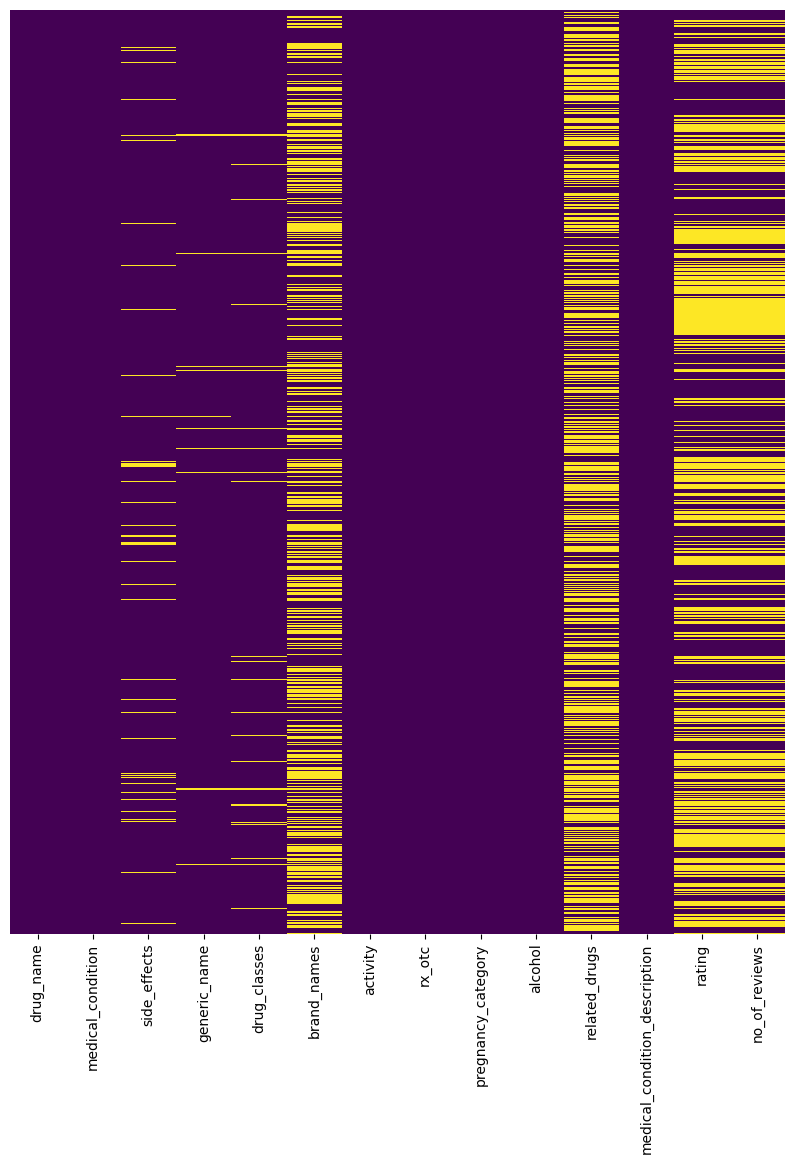

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data
df.info()

# Calculate duplicates
dups = df.duplicated()

# Report if there are any duplicates
print(df.any())

# List all duplicate rows
print("Duplicate Rows", df[dups])

# Cardinality
print("Cardinality (unique values per column):")
print(df.nunique())  # To determine the maximum and minimum number of variations in each column of the dataset

# Let's now check for null fields
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Display the count of missing values for each column
print("\nMissing Values Count per Column:")
print(df.isnull().sum())


## Observations:
- It can be noticed here that the missing values are being marked as Nan and this needs to be removed

## Descriptive Analytics

In [26]:
# Group data accordingly
unique_medical_conditions = list(data.medical_condition.unique())
unique_drugs = list(data.drug_name.unique())

print(f"List of unique Medical Conditions being discussed are:\n{unique_medical_conditions}\n\n")
print(f"List of unique drugs being discussed are:\n{unique_drugs}\n\n")

print(f"Number of unique drugs: {len(unique_drugs)}")
print(f"Total data rows: {data.shape[0]}")

List of unique Medical Conditions being discussed are:
['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina', 'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer', 'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19', 'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea', 'Eczema', 'Erectile Dysfunction', 'Gastrointestinal', 'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes', 'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence', 'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis', 'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis', 'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke', 'Swine Flu', 'UTI', 'Weight Loss']


List of unique drugs being discussed are:
['doxycycline', 'spironolactone', 'minocycline', 'Accutane', 'clindamycin', 'Aldactone', 'tretinoin', 'isotretinoin', 'Bactrim', 'Retin-A', 'Aczone', 'benzoyl peroxide', 'Differin', 'Epiduo', 'adapalene', 'cephalexin', 'Doryx', 'tetracycline', 'Septr

## Observation:
- Number of unique drugs and total number of data_rows are almost same, meaning that histograms for drugs won't be of any use here as there are not many repititions
- Histograms are suggested to be used when there are many data repetitions involved and there is imortance to the 'count' of a property
- But they can be used for other attributes

In [27]:
# Drugs being used for multiple medical conditions
drugs_multiple_condns = []
drugs_so_far = []

for i in data.index:
    if data["drug_name"][i] in drugs_so_far and data["drug_name"][i] not in drugs_multiple_condns:
        drugs_multiple_condns.append(data["drug_name"][i])
    if data["drug_name"][i] not in drugs_so_far:
        drugs_so_far.append(data["drug_name"][i])

print("The below is the list of only drugs that have multi-purpose:")
for i in drugs_multiple_condns:
    print(i)

The below is the list of only drugs that have multi-purpose:
minocycline
erythromycin
triamcinolone
fluocinolone
doxepin
fluticasone
mometasone
beclomethasone
ciclesonide
acyclovir
minoxidil
budesonide
hydrocortisone
cromolyn
diclofenac
diphenhydramine
clindamycin
betamethasone


Bar Graphs

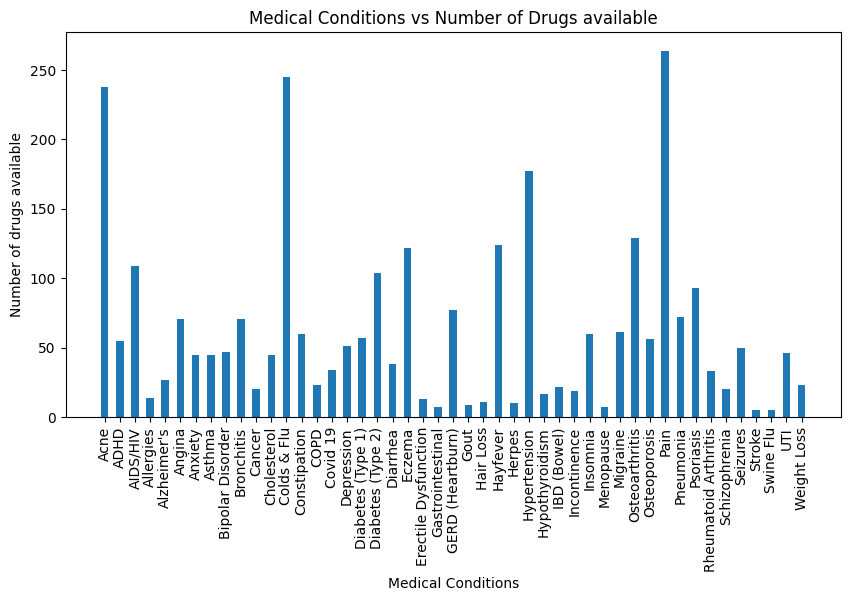

In [28]:
available_drugs_for_condns = [0]*len(unique_medical_conditions)

for i in data.index:
    medical_condition = str(data['medical_condition'][i])
    indexx = unique_medical_conditions.index(medical_condition)
    available_drugs_for_condns[indexx] += 1

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("Medical Conditions")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available")
plt.xticks(rotation=90)
plt.show()

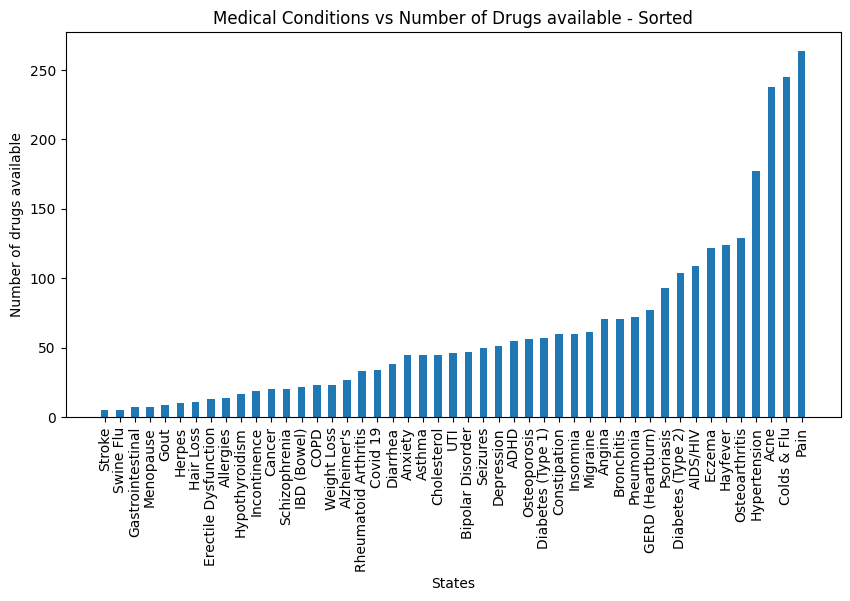

In [29]:
# Pareto Chart
available_drugs_for_condns, unique_medical_conditions = zip(*sorted(zip(available_drugs_for_condns, unique_medical_conditions)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("States")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available - Sorted")
plt.xticks(rotation=90)
plt.show()

## Observations
1. Most drugs are available to aid for pain, colds&flu, hypertension, osteoarthritis and Hayfever
2. Least number of drugs are available for strokes, swine flu, gastrointestinal problems, menopause and gout


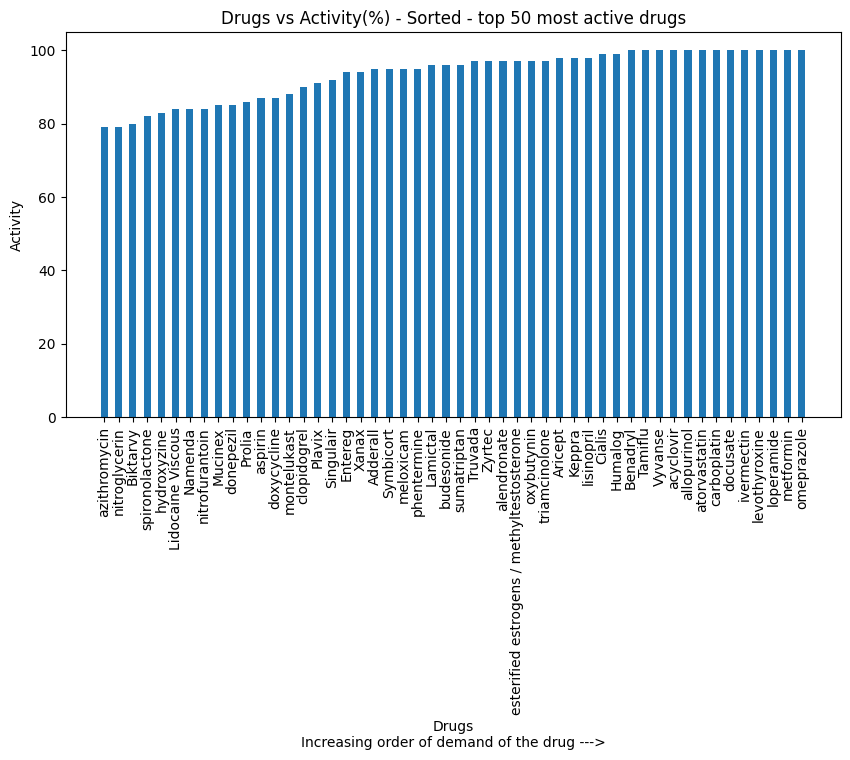

In [30]:
# print(int(data["activity"][555][:-1]))
# Drugs vs Activity
activities = []
drugs = []
for i in data.index:
    activities.append(int(data["activity"][i][:-1]))
    drugs.append(str(data["drug_name"][i]))


# Pareto Chart
activities, drugs = zip(*sorted(zip(activities, drugs)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(drugs[-50:], activities[-50:], width = 0.5)
plt.xlabel("Drugs\nIncreasing order of demand of the drug --->")
plt.ylabel(f"Activity")
plt.title(f"Drugs vs Activity(%) - Sorted - top 50 most active drugs")
plt.xticks(rotation=90)
plt.show()

## Observations:
1. Omeprazole, metformin, loperamide, etc in order of decreasing priority are the most active drugs, i.e, they are in most demand from the consumer side
2. It can be noticed that the top 10 in-demand drugs are of same importance in the consumer market

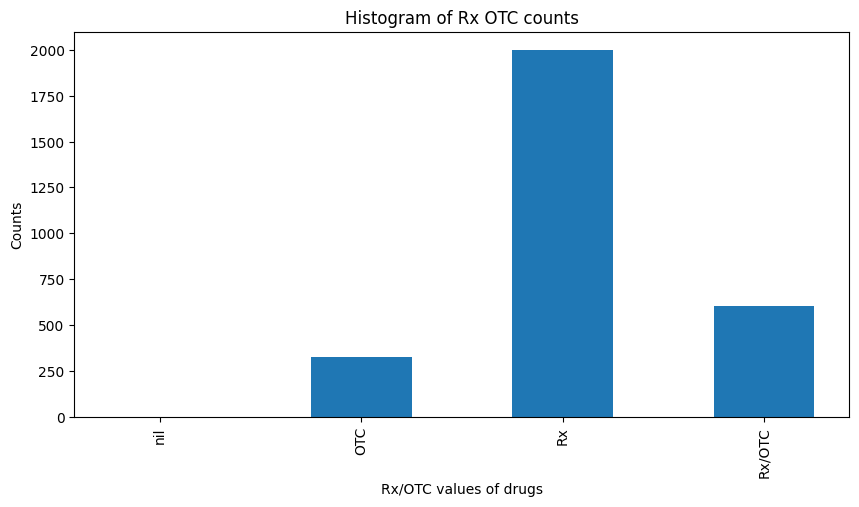

In [31]:
unique_rx_otc = ['nil', 'OTC', 'Rx', 'Rx/OTC']

cnts_rtx_otc = [0]*len(unique_rx_otc)
for i in data.index:
    if data["rx_otc"][i] == None:
        cnts_rtx_otc[0] += 1
    elif data["rx_otc"][i] == 'OTC':
        cnts_rtx_otc[1] += 1
    elif data["rx_otc"][i] == 'Rx':
        cnts_rtx_otc[2] += 1
    elif data["rx_otc"][i] == 'Rx/OTC':
        cnts_rtx_otc[3] += 1

# Pareto Chart
# cnts, unique_rx_otc = zip(*sorted(zip(cnts, unique_rx_otc)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_rx_otc, cnts_rtx_otc, width = 0.5)
plt.xlabel("Rx/OTC values of drugs")
plt.ylabel(f"Counts")
plt.title(f"Histogram of Rx OTC counts")
plt.xticks(rotation=90)
plt.show()

## Observations:
1. Most of the drugs have Rx, i.e, most of the drugs require prescription to be used. (Around 1900 from the available 2900+ drugs)
2. The remaining 1000 drugs are not that dangerous and can be prescribed or not prescribed.

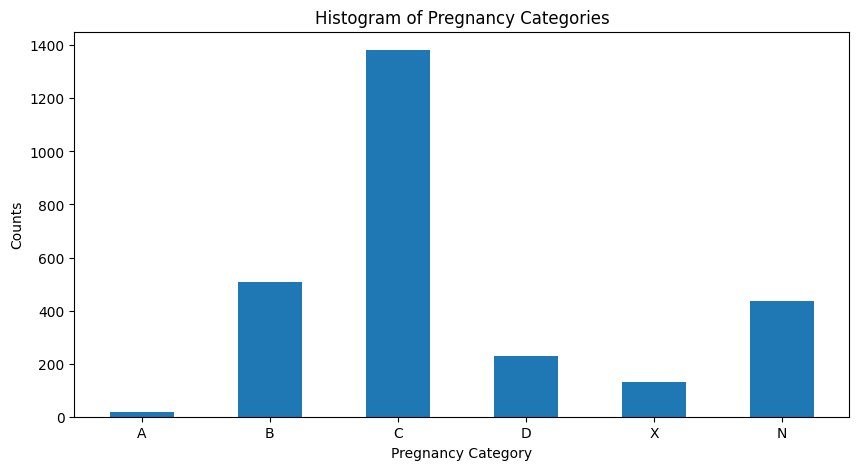

In [32]:
pregnancy_categories = ['A', 'B', 'C', 'D', 'X', 'N']

cnts_preg_cat = [0]*len(pregnancy_categories)
for i in data.index:
    if data["pregnancy_category"][i] == 'A':
        cnts_preg_cat[0] += 1
    elif data["pregnancy_category"][i] == 'B':
        cnts_preg_cat[1] += 1
    elif data["pregnancy_category"][i] == 'C':
        cnts_preg_cat[2] += 1
    elif data["pregnancy_category"][i] == 'D':
        cnts_preg_cat[3] += 1
    elif data["pregnancy_category"][i] == 'X':
        cnts_preg_cat[4] += 1
    elif data["pregnancy_category"][i] == 'N':
        cnts_preg_cat[5] += 1


# Pareto Chart
#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(pregnancy_categories, cnts_preg_cat, width = 0.5)
plt.xlabel("Pregnancy Category")
plt.ylabel(f"Counts")
plt.title(f"Histogram of Pregnancy Categories")
plt.xticks(rotation=0)
plt.show()

## Observation:
- Most drugs come under the pregnancy category 'C', meaning that most of the drugs show an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
- Some chunk of drugs come under categories 'B', meaning that they have no effect on the fetus
- About 500 drugs are not classified by NDA

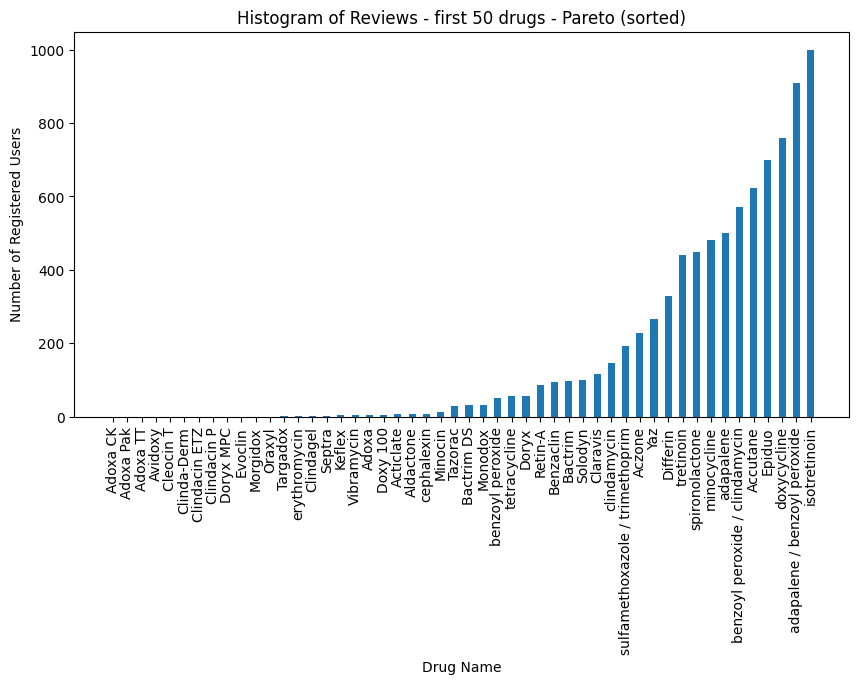

In [34]:
import numpy as np  # Import numpy to use np.isnan
import matplotlib.pyplot as plt

drug_names = []
no_of_ratings = []

num = 50

cnt = 0
for i in data.index:
    if cnt != num:
        drug_names.append(data["drug_name"][i])
        if not np.isnan(data["no_of_reviews"][i]):
            no_of_ratings.append(int(data["no_of_reviews"][i]))
        else:
            no_of_ratings.append(0)
    else:
        break
    cnt += 1

# Bar Graph
fig = plt.figure(figsize=(10, 5))
no_of_ratings, drug_names = zip(*sorted(zip(no_of_ratings, drug_names)))

# Creating the bar plot
# num = 10
plt.bar(drug_names, no_of_ratings, width=0.5)
plt.xlabel("Drug Name")
plt.ylabel(f"Number of Registered Users")
plt.title(f"Histogram of Reviews - first {num} drugs - Pareto (sorted)")
plt.xticks(rotation=90)
plt.show()


## Observation:
- drugs 'isotreonoin', 'adapalene', 'doxycycline', etc in sequential orders are reviewed the most by users, indicating that they are the most used drugs in the first 50 mentioned drugs

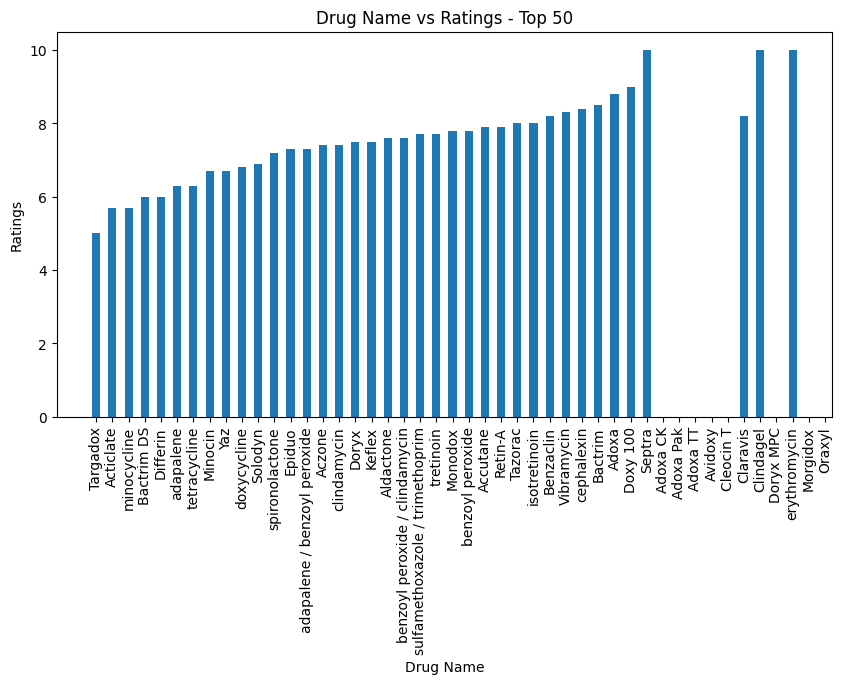

In [35]:
# Ratings
num = 50
drug_names = data["drug_name"][:num]
ratings = data["rating"][:num]
ratings, drug_names = zip(*sorted(zip(ratings, drug_names)))
# Pareto Chart
#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(drug_names, ratings, width = 0.5)
plt.xlabel("Drug Name")
plt.ylabel(f"Ratings")
plt.title(f"Drug Name vs Ratings - Top {num}")
plt.xticks(rotation=90)
plt.show()

<ipython-input-36-16915d7383c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x = 'rating',palette='plasma')


<Axes: xlabel='rating', ylabel='count'>

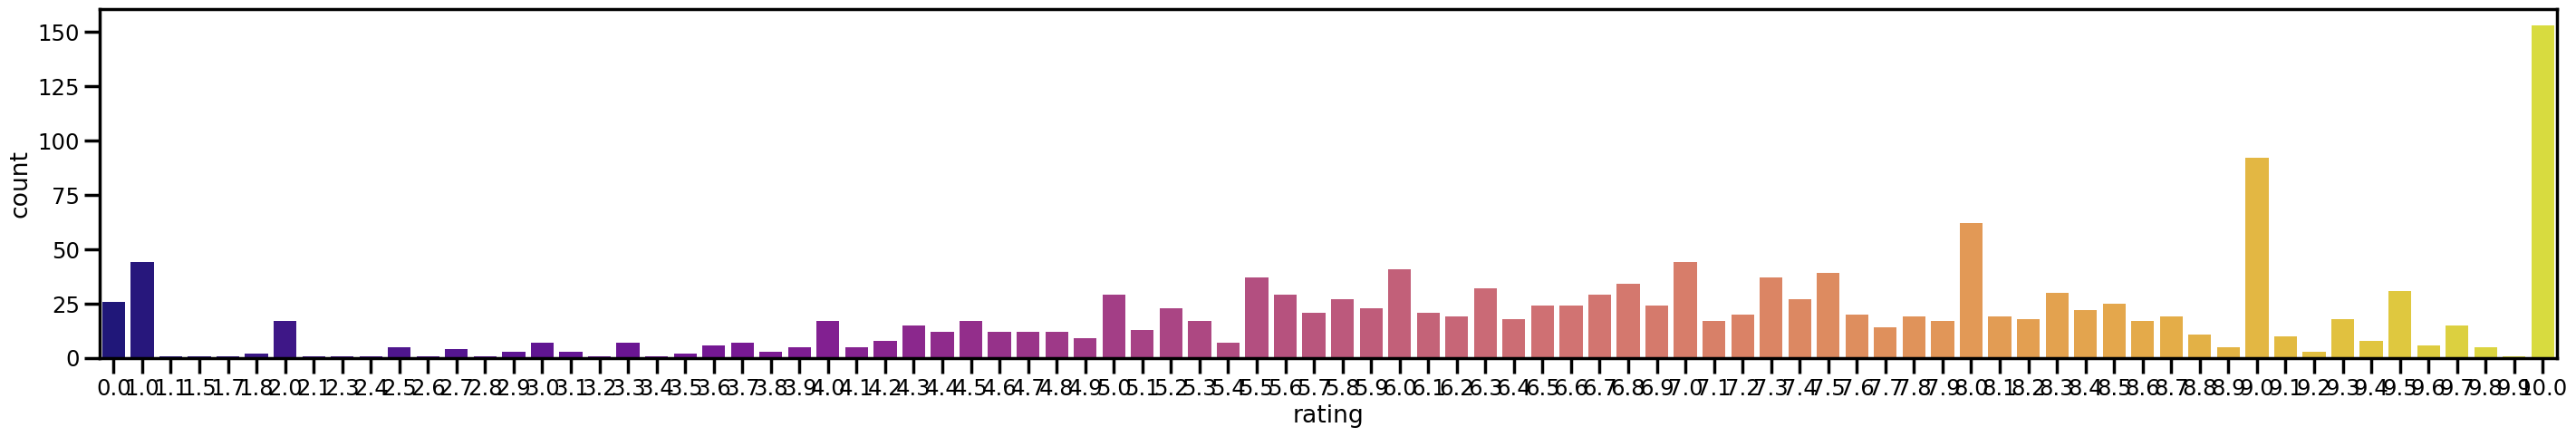

In [36]:
# Examining the variable's goal rating
sns.set_context('poster', font_scale=0.8)
plt.figure(figsize=(35,5))
sns.countplot(data=data,x = 'rating',palette='plasma')

## Observations
- erythromycin, clindagel, septra, etc are the top rated drugs in the first 50 drugs
- **It can be noticed from this that the drugs with the most number of reviews are not in the top rated drugs, i.e, number of reviews is not an apt parameter to judge the usefulness of a drug**

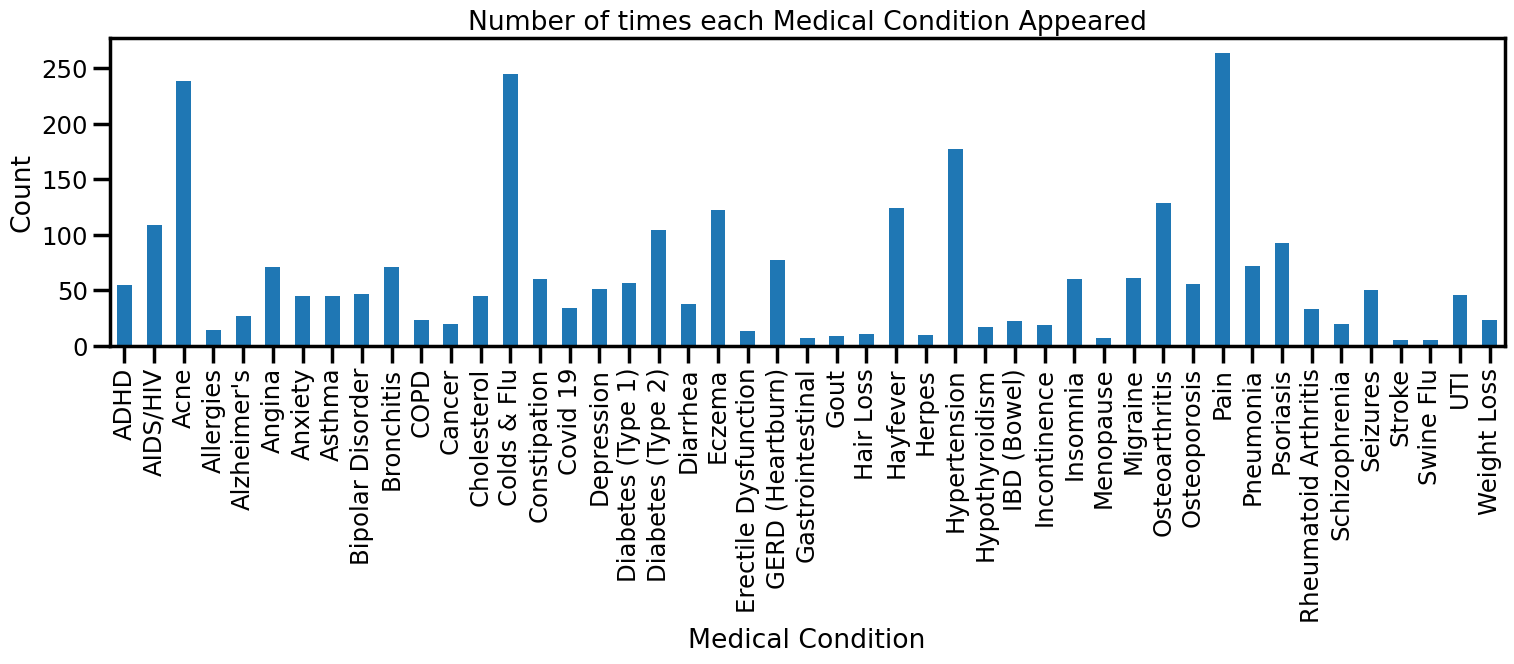

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_context('poster', font_scale=0.8)

# Count occurrences of each medical condition
condition_counts = data.groupby('medical_condition').size()

# Plot the bar chart
condition_counts.plot(kind='bar', figsize=(18, 4))
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Number of times each Medical Condition Appeared')
plt.xticks(rotation=90)
plt.show()


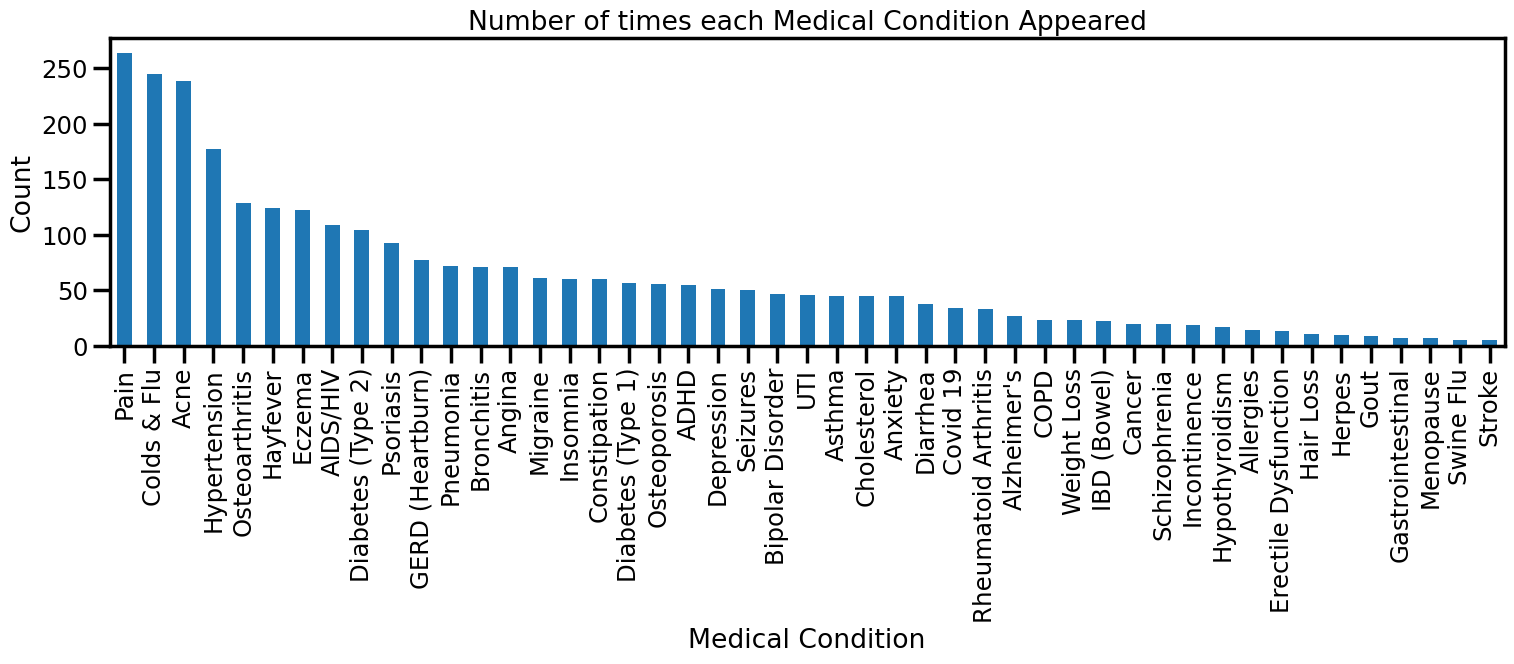

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_context('poster', font_scale=0.8)

# Count occurrences of each medical condition
condition_counts = data['medical_condition'].value_counts()

# Plot the bar chart
condition_counts.plot(kind='bar', figsize=(18, 4))
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Number of times each Medical Condition Appeared')
plt.xticks(rotation=90)
plt.show()


Average number of times that medical conditions were noticed

## Observations:
- It can be noticed that weight loss drugs have most number of reviews, showing that it is a popular concern among drug-consumers
- ADHD, Anxiety, Bipolar Disorder, Depression, Erectile Disfunction are the next most used drugs

Pie Chart

1. We can use Pie Charts only for a limited combinations as it is feasible to use pie charts only when the number of attributes are lesser
2. Some possibilities are:
- Rx/OTC Distributions
- Percentage of drugs reactions with alcohol

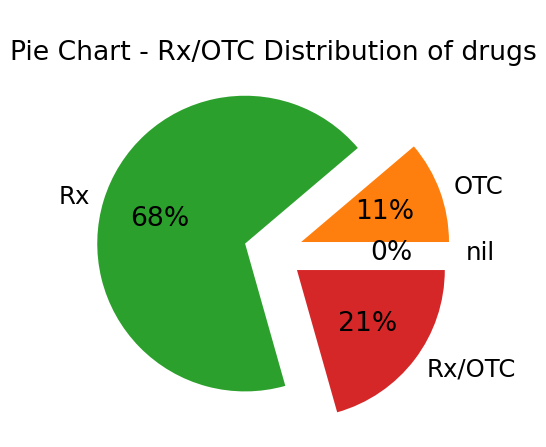

In [43]:
# Rx/OTC distributions
y = np.array(cnts_rtx_otc)
mylabels = unique_rx_otc
myexplode = [0.2]*len(unique_rx_otc)
plt.title("\nPie Chart - Rx/OTC Distribution of drugs")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show()

## Observations
- It can be observed that 68% of the drugs are of type 'Rx', meaning that they can only be used if prescribed by a doctor
- 21% of the drugs can either be prescribed or not prescribed by a doctor
- 11% of the drugs need not be prescribed by a doctor

Target distribution on pregnancy_category column

pregnancy_category
C    1382
B     509
N     436
0     229
D     228
X     129
A      18
Name: count, dtype: int64

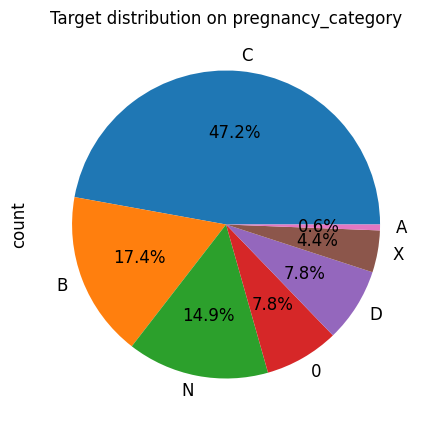

In [44]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
data['pregnancy_category'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on pregnancy_category")
data['pregnancy_category'].value_counts()

## Observations:
- Just like the bar graph, it is clear that most drugs are of pregnancy_category type C, meaning that Animal reproduction studies have shown an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.

Target distribution on medical condition

medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Loss              23
IBD (Bowel)              22
Cancer                   20
Schizophrenia            20
Incontinence             19
Hypothyroidism           17
Allergies                14
Erectile Dysfunction     13
Hair Loss                11
Herpes                   10
Gout                      9
Gastrointestinal          7
Menopause                 7
Swine Flu                 5
Stroke                    5
Name: count, dtype: int64

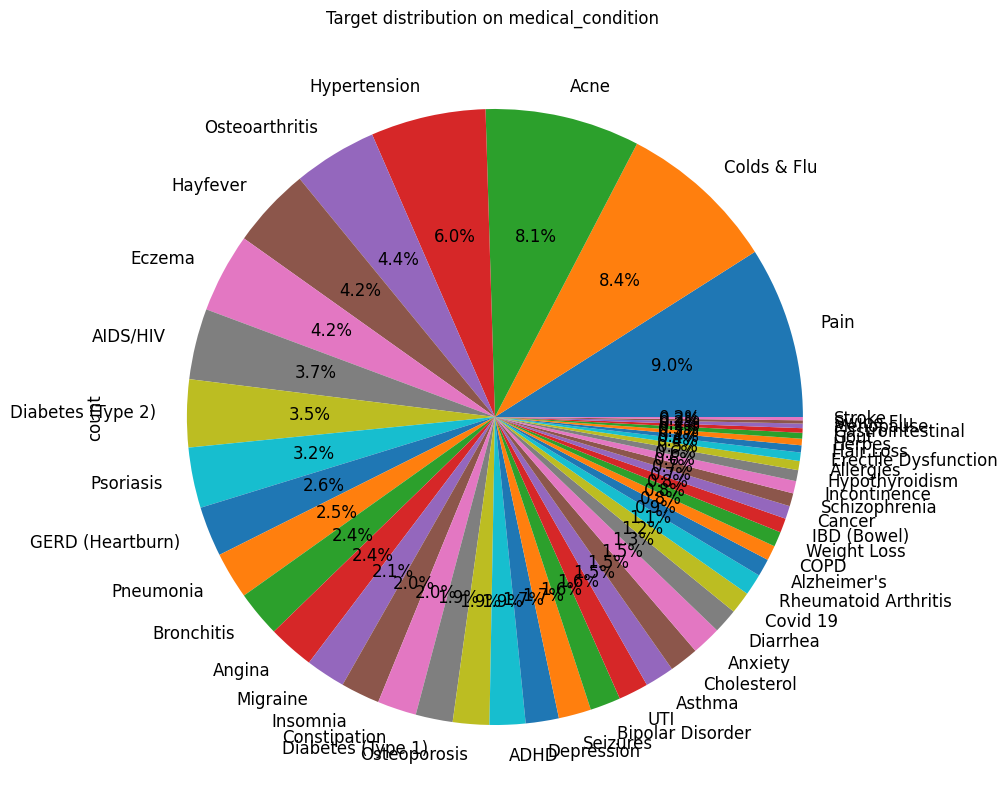

In [45]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(10,10))
# Pie plot
data['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition ")
data['medical_condition'].value_counts()

## Observations:
Top 10 diseases with most medicines available
- Pain                    264
- Colds & Flu             245
- Acne                    238
- Hypertension            177
- Osteoarthritis          129
- Hayfever                124
- Eczema                  122
- AIDS/HIV                109
- Diabetes (Type 2)       104
- Psoriasis                93

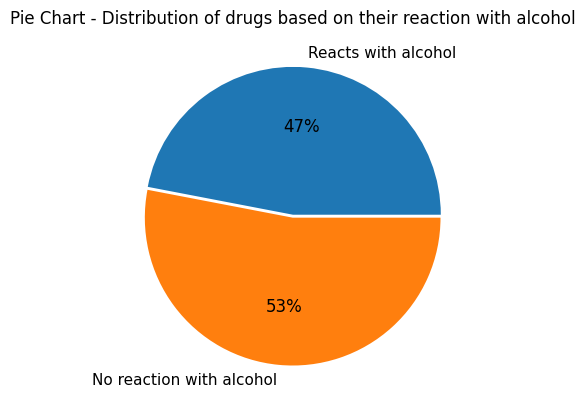

In [46]:
# Alcohol
cnts = 0

for i in data.index:
    if data["alcohol"][i] == 'X':
        cnts += 1
cnts_alcohol = [cnts, data.shape[0] - cnts]
mylabels = ["Reacts with alcohol", "No reaction with alcohol"]

# Alcohol
y = np.array(cnts_alcohol)
# mylabels = unique_rx_otc
myexplode = [0.01]*2
plt.title("Pie Chart - Distribution of drugs based on their reaction with alcohol")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show()

## Observations:
- About 47% of the drugs have a reaction with alcohol, implying that alcoholic patients should have alternatives incase they have problems that can be solved only with these drugs

Line & Scatter Plots

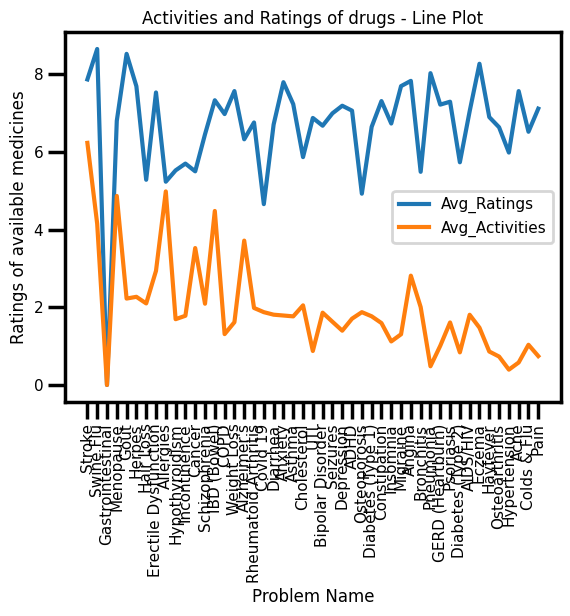

In [47]:
# Medical Conditions vs Ratings

avg_ratings = [0]*len(unique_medical_conditions)
avg_denominator = [0]*len(unique_medical_conditions)
avg_activities = [0]*len(unique_medical_conditions)
for i in range(len(unique_medical_conditions)):
    for j in data.index:
        if str(data["medical_condition"][j]) == unique_medical_conditions[i] and not np.isnan(data["rating"][j]):
            avg_ratings[i] += float(data["rating"][j])
            avg_denominator[i] += 1
            avg_activities[i] += float(data["activity"][j][:-1])

for i in range(len(unique_medical_conditions)):
    if avg_denominator[i] != 0:
        avg_ratings[i] = avg_ratings[i]/avg_denominator[i]
        avg_activities[i] = (avg_activities[i]/avg_denominator[i])/10

# for i in range(len(unique_medical_conditions)):
#     if avg_ratings[i]:
#         avg_ratings[i] = 0


plt.plot(unique_medical_conditions, np.array(avg_ratings))
plt.plot(unique_medical_conditions, np.array(avg_activities))
plt.xlabel(f"Problem Name")
plt.ylabel(f"Ratings of available medicines")
plt.title(f"Activities and Ratings of drugs - Line Plot")
plt.legend(["Avg_Ratings", "Avg_Activities"])
plt.xticks(rotation=90)
plt.show()

## Observations:
- It can clearly be noticed from here that except for a few anomalies, the ratings and activities of a drug are almost similar
- A drug with a good rating has more activity in sales and a drug with less rating has less activity in sales

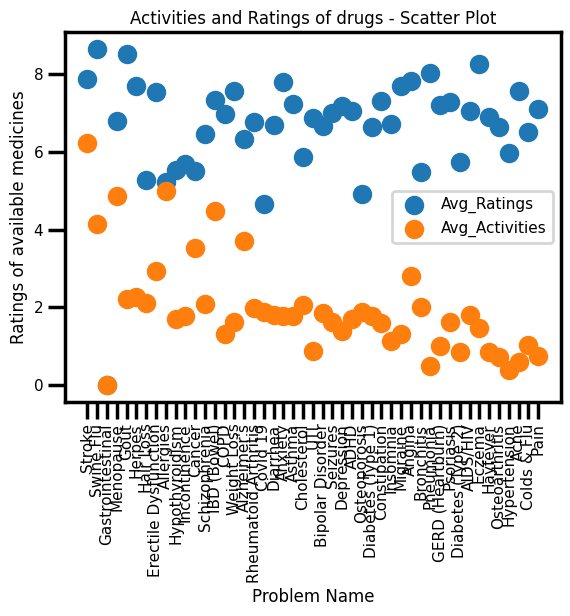

In [48]:
plt.scatter(unique_medical_conditions, np.array(avg_ratings))
plt.scatter(unique_medical_conditions, np.array(avg_activities))
plt.xlabel(f"Problem Name")
plt.ylabel(f"Ratings of available medicines")
plt.title(f"Activities and Ratings of drugs - Scatter Plot")
plt.legend(["Avg_Ratings", "Avg_Activities"])
plt.xticks(rotation=90)
plt.show()

## Observations:
- While not much can be concluded from this scatter, we can atleast say that the two parameters, ratings and activities are linearly separable

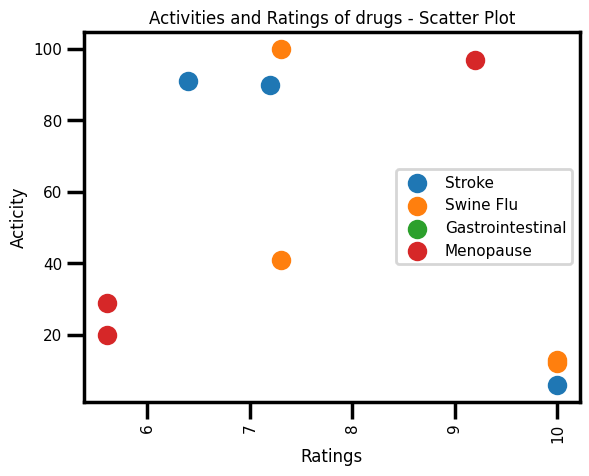

In [49]:
num = 4
diseases = unique_medical_conditions[:num]
property_chosen = [data["rating"], data["activity"]]

properties = []

for i in diseases:
    dataa = data.loc[data['medical_condition'] == i]
    rating = list(dataa["rating"])
    activity = []
    for j in dataa.index:
        activity.append(int(dataa["activity"][j][:-1]))
    plt.scatter(rating, activity)
    plt.xlabel(f"Ratings")
    plt.ylabel(f"Acticity")
    plt.title(f"Activities and Ratings of drugs - Scatter Plot")
    plt.legend(diseases)
    plt.xticks(rotation=90)


## Observations:
- It can be observed from the data that we cannot differentiate diseases based on their ratings and activity values

Box-Whisker Plots

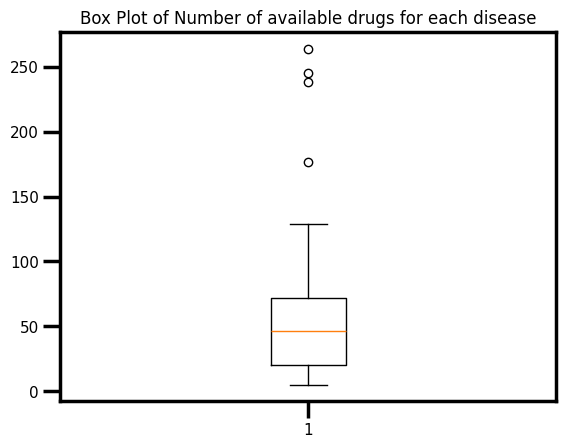

In [50]:
# available_drugs_for_condns
plt.boxplot(available_drugs_for_condns)
plt.title(f"Box Plot of Number of available drugs for each disease")
plt.show()

## Observations:
- It can be observed that this plot is not skewed as the median or 50 percentile is almost in the middle of the box.
- However, it has 4 outliers on the top meaning that there are 4 diseases who have more than abundant number of drugs available for treatment

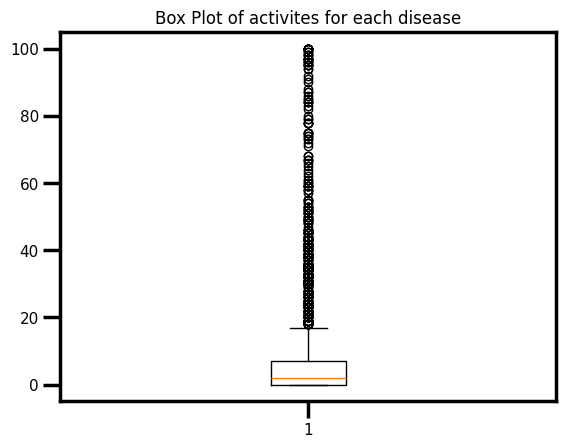

In [51]:
plt.boxplot(activities)
plt.title(f"Box Plot of activites for each disease")
plt.show()

## Observations:
- It can be observed that the given plot is right-skewed as the median/50th percentile is slightly inclined towards the bottom.
- It can also be noticed that this plot has so many outliers, stating that 'activities' parameter is not an apt attribute to use to measure the demand of a drug

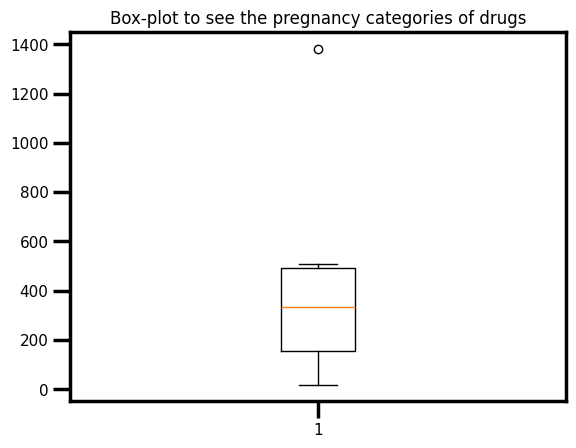

In [52]:
plt.boxplot(cnts_preg_cat)
plt.title(f"Box-plot to see the pregnancy categories of drugs")
plt.show()

## Observations:
- It can be observed that this plot of not skewed as the median or 50 percentile is almost in the middle of the box.
- However, it has no outliers on the top meaning that this can be a good attribute to be used to classify drugs

Comparing rx_oct and medical_condition

In [53]:
import plotly.express as ex
ex.box(x = 'rx_otc', y = 'medical_condition',data_frame = data, template='seaborn', notched=True, width=800, height=500)

## Observations:
- Drugs that are used for weight loss have the most need to be prescribed by Doctors only and Acne curing drugs have the least need to be prescribed by doctors


Comparing drug_classes and medical_condition

In [54]:
ex.box(x = 'medical_condition', y = 'drug_classes',data_frame = data, template='seaborn', notched=True, width=1200, height=600)

Comparing medical_condition and pregnancy_category

In [55]:
ex.box(x = 'medical_condition', y = 'pregnancy_category',data_frame = data, template='seaborn', notched=True, width=1200, height=600)

## Observations:
- ss

Violin Plots

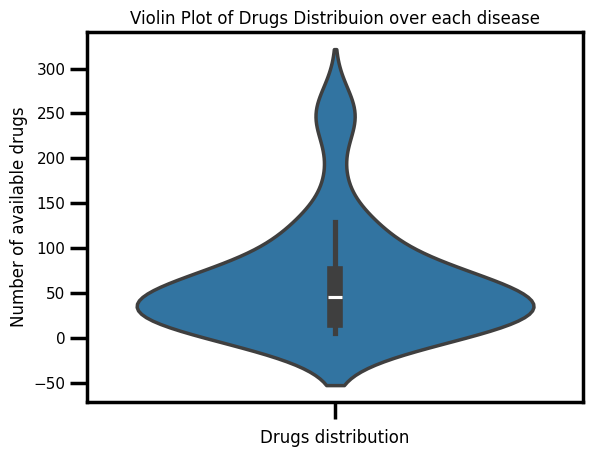

In [56]:
sns.violinplot(available_drugs_for_condns)
plt.xlabel(f"Drugs distribution")
plt.ylabel(f"Number of available drugs")
plt.title(f"Violin Plot of Drugs Distribuion over each disease")
plt.xticks(rotation=90)
plt.show()

## Observations:
- Violin plots are an improvement over box plots and they also show the density (here, magnitude) variation of the values.
- From the above violin plot, it can be seen that this plot is not skewed as the median or 50 percentile is almost in the middle of the box.
- But it has a significant number of outliers as the spread of the density is not uniform on the to (from after 150)

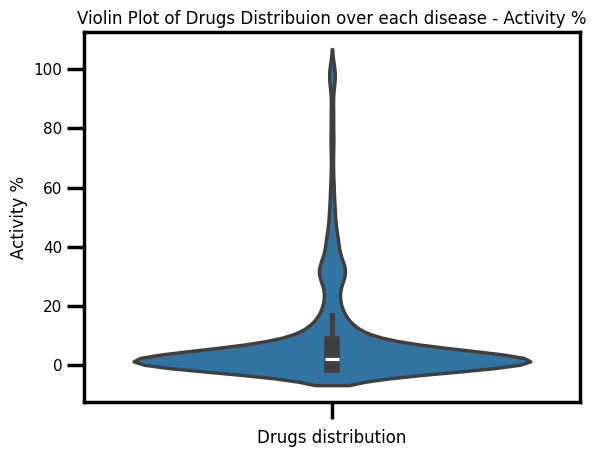

In [57]:
sns.violinplot(activities)
plt.xlabel(f"Drugs distribution")
plt.ylabel(f"Activity %")
plt.title(f"Violin Plot of Drugs Distribuion over each disease - Activity %")
plt.xticks(rotation=90)
plt.show()

In [60]:
import stemgraphic


## Observations:
- Violin plots are an improvement over box plots and they also show the density (here, magnitude) variation of the values.
- From the above violin plot, it can be seen that this plot is right-skewed as the median or 50 percentile is almost in the botton of the box.
- But it has a large number of outliers as the spread of the density is not at all uniform on the to (from after 20)
- The shape of the density indicated that the first few mentioned drugs have the most activity (usage from users)

Stem Leaf Plots

(<Figure size 750x300 with 1 Axes>, <Axes: >)

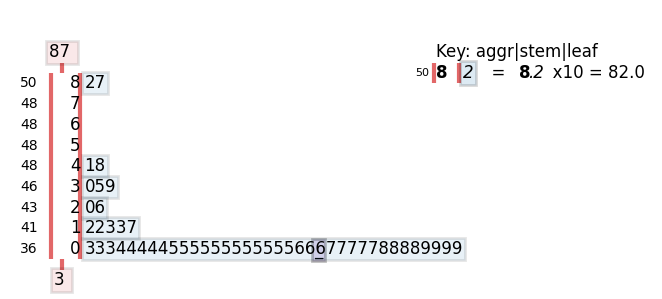

In [61]:
data = pd.read_csv(r"drugs_side_effects_drugs_com.csv")
num = 50
activity = []
for i in data.index:
    activity.append(int(data["activity"][i][:-1]))
# print(f"Number of Reviews of the first {num} drugs")
stemgraphic.stem_graphic(activity[:num] , scale = 10)


In [64]:
pip install plotly


In [65]:
import plotly.graph_objects as go


## Observations:
- Most of the drugs have their activities lying in the range 0-10 as that has the most values in the first 50 drugs
- 82, 87, 41, 48 percentages are all mostly outliers, but they cannot be ignored as their activity percent is higher, meaning that they have more demand in market

Radar Chart

In [67]:
categories = ["activity", "rating", "no_of_reviews"]

print("Radar Chart")
fig = go.Figure()
plt.Figure(figsize =(5, 3))

fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Acne'], theta=categories, fill='toself', name='acne'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Anxiety'], theta=categories, fill='toself', name='anxiety'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Asthma'], theta=categories, fill='toself', name='asthma'))
fig.add_trace(go.Scatterpolar(r=data.loc[data["medical_condition"] == 'Weight Loss'], theta=categories, fill='toself', name='weight loss'))
fig.update_layout(autosize=False, width=400, height=400)

fig.show()

Radar Chart


## Observations:
- It can be observed that the ratios of ratings, activites, and number of reviews of acne, anxiety, asthma and weight loss are all aligned.


Funnel Chart

In [69]:
# Import the necessary library
import plotly.express as px

# Example data (you need to ensure these lists are correctly populated)
arr = []
# for i in data.columns[3:]:
#     arr.append(math.ceil(statistics.mean(data1[i])))
#available_drugs_for_condns, unique_medical_conditions = zip(*sorted(zip(available_drugs_for_condns, unique_medical_conditions)))

data = dict(time=available_drugs_for_condns,
            steps=unique_medical_conditions)

# Create the funnel chart using plotly.express
fig = px.funnel(data, x='time', y='steps')

# Display the chart
print("Funnel Chart for Diseases and Available drugs")
fig.show()


Funnel Chart for Diseases and Available drugs


## Observations:
1. As noted in the pareto chats, it can be seen that most drugs are available for pain, acne, osteoarithritis, etc in priority order

Heat Maps

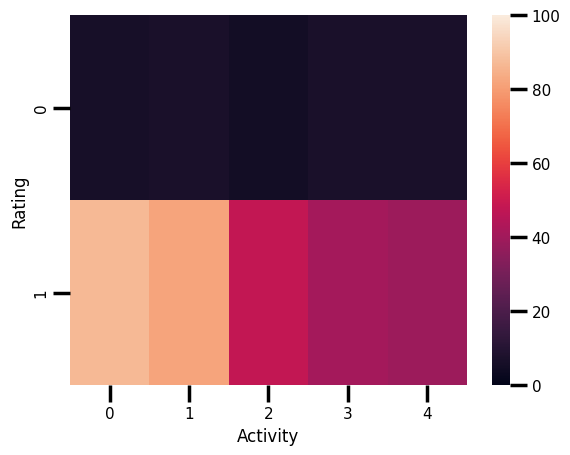

In [70]:
data = load_data()
activity = []
rating = []
for i in data.index:
    activity.append(int(data["activity"][i][:-1]))
    if not np.isnan(data["rating"][i]):
            rating.append(int(data["rating"][i]))
    else:
            rating.append(0)
num = 5
# correlation_matrix = np.corrcoef(activity[:num], rating[:num])
heatmap_sepal = sns.heatmap([rating[:num], activity[:num]], vmin = 0, vmax = 100)
plt.xlabel("Activity")
plt.ylabel("Rating")
plt.show()

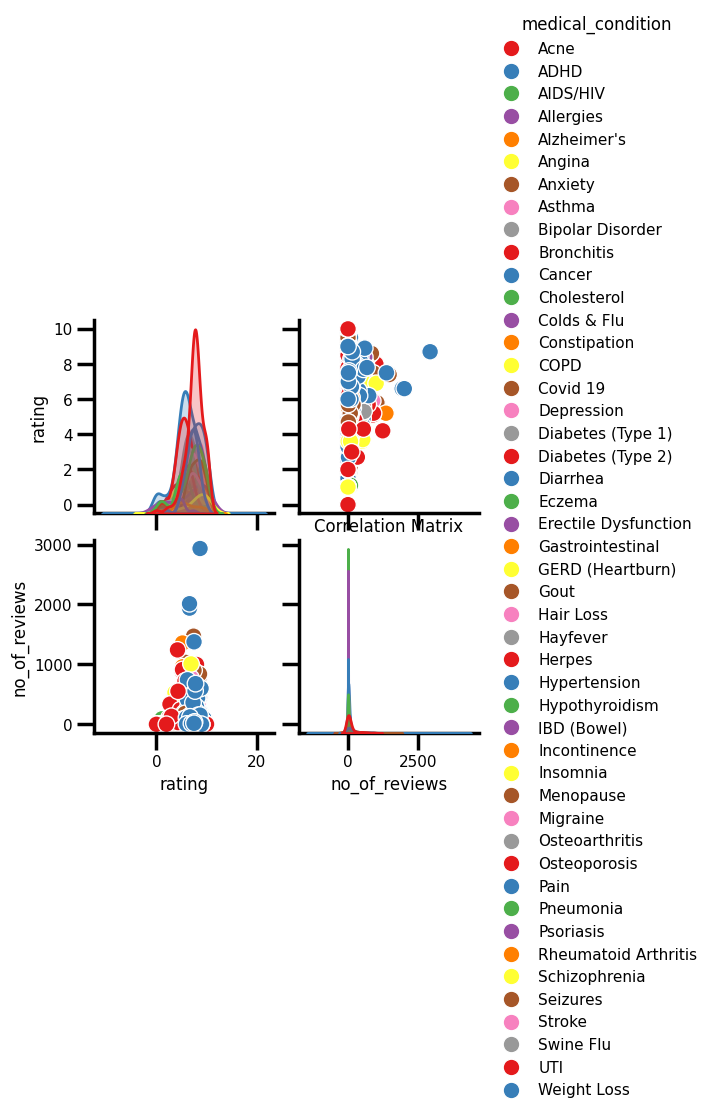

In [71]:
data = load_data()
df = data[["medical_condition", "rating", "no_of_reviews"]]
# df.drop(columns=df.columns[0], axis=1,  inplace=True)
sns.pairplot(df, kind="scatter", hue="medical_condition", palette="Set1")
plt.title("Correlation Matrix")
plt.show()

## Apriori Algorithm

To find drugs that are most related to each other, i.e, to find Frequent Patterns

In [73]:
# Initialize the 'related_drugs' list as a list of empty lists
related_drugs = [[] for _ in range(len(data))]  # or adjust the size based on your data

cnt = 0
for i in data.index:
    related_drugs[cnt].append(data["drug_name"][i])
    cnt += 1

print(related_drugs)


[['doxycycline'], ['spironolactone'], ['minocycline'], ['Accutane'], ['clindamycin'], ['Aldactone'], ['tretinoin'], ['isotretinoin'], ['Bactrim'], ['Retin-A'], ['Aczone'], ['benzoyl peroxide'], ['Differin'], ['Epiduo'], ['adapalene'], ['cephalexin'], ['Doryx'], ['tetracycline'], ['Septra'], ['Solodyn'], ['Tazorac'], ['Vibramycin'], ['Acticlate'], ['benzoyl peroxide / clindamycin'], ['Doxy 100'], ['Keflex'], ['sulfamethoxazole / trimethoprim'], ['Benzaclin'], ['Monodox'], ['Targadox'], ['Adoxa'], ['Adoxa CK'], ['Adoxa Pak'], ['Adoxa TT'], ['Avidoxy'], ['Bactrim DS'], ['Cleocin T'], ['Clindagel'], ['Doryx MPC'], ['erythromycin'], ['Morgidox'], ['Oraxyl'], ['Claravis'], ['Clinda-Derm'], ['Evoclin'], ['Minocin'], ['Yaz'], ['adapalene / benzoyl peroxide'], ['Clindacin ETZ'], ['Clindacin P'], ['Clindacin PAC'], ['ClindaReach Pledget'], ['Clindets'], ['Milk of Magnesia'], ['Septra DS'], ['Yasmin'], ['Ziana'], ['Absorica'], ['Acanya'], ['Amnesteem'], ['azelaic acid'], ['Co-trimoxazole'], ['dap

In [75]:
pip install mlxtend


In [76]:
from mlxtend.preprocessing import TransactionEncoder


In [79]:
from mlxtend.preprocessing import TransactionEncoder

# Fit and transform the data
te = TransactionEncoder()
te_ary = te.fit_transform(related_drugs)

# Print the one-hot encoded Boolean array
print(te_ary)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Sample related_drugs list (example)
# Each list represents a transaction, and each element in the list represents a drug
related_drugs = [['DrugA', 'DrugB', 'DrugC'],
                 ['DrugB', 'DrugD'],
                 ['DrugA', 'DrugC'],
                 ['DrugB', 'DrugD', 'DrugC']]

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Transform the data into a one-hot encoded array
te_ary = te.fit_transform(related_drugs)

# Print the one-hot encoded Boolean array
print(te_ary)

# You can also convert this into a DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)


In [95]:
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

   DrugA  DrugB  DrugC  DrugD
0   True   True   True  False
1  False   True  False   True
2   True  False   True  False
3  False   True   True   True


In [96]:
pip install mlxtend


In [97]:
from mlxtend.frequent_patterns import apriori, association_rules


In [98]:
from mlxtend.frequent_patterns import apriori, association_rules

# Sample DataFrame in one-hot encoded format (for example)
df = pd.DataFrame({
    'item1': [1, 0, 1, 1],
    'item2': [0, 1, 1, 0],
    'item3': [1, 0, 0, 1],
})

# Use the Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Print frequent itemsets
print(frequent_itemsets)

# Use the Association Rules algorithm to generate rules with a minimum confidence
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
    print("\nAssociation Rules:")
    print(rules)
else:
    print("No frequent itemsets found. Try adjusting the support threshold.")


   support        itemsets
0     0.75         (item1)
1     0.50         (item2)
2     0.50         (item3)
3     0.25  (item2, item1)
4     0.50  (item3, item1)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0     (item3)     (item1)                 0.5                0.75      0.5   

   confidence      lift  representativity  leverage  conviction  \
0         1.0  1.333333               1.0     0.125         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0            0.5  0.666667        1.0    0.833333  


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [99]:
# Get the length of the largest frequent itemset
max_len = frequent_itemsets["itemsets"].apply(lambda x: len(x)).max()

# Print only the last level of frequent itemsets
print("Frequent Itemsets (Level {}):".format(max_len))
last_level_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x))==max_len]
print(last_level_itemsets)

# Use the Association Rules algorithm to generate rules with a minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the association rules for the last level frequent itemsets
print("\nAssociation Rules for Frequent Itemsets (Level {}):".format(max_len))
last_level_rules = rules[rules["antecedents"].apply(lambda x: len(x)==max_len)]
print(last_level_rules)

Frequent Itemsets (Level 2):
   support        itemsets
3     0.25  (item2, item1)
4     0.50  (item3, item1)

Association Rules for Frequent Itemsets (Level 2):
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


## Observations:
- tt

## FP Growth Algorithm

To find drugs that are most related to each other, i.e, to find Frequent Patterns

In [100]:
#traversal through database for once took 4 mins
import numpy as np
# Gather All Items of Each Transactions into Numpy Array
from itertools import chain
transaction = list(chain.from_iterable(related_drugs))
# converting to numpy array
transaction = np.array(transaction)
print(transaction)

['DrugA' 'DrugB' 'DrugC' 'DrugB' 'DrugD' 'DrugA' 'DrugC' 'DrugB' 'DrugD'
 'DrugC']


In [101]:
#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"])
# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1
#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)
# Making a New Appropriate Pandas DataFrame for Visualizations
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
#  Initial Visualizations
df_table.head(5).style.background_gradient(cmap='Blues')

In [102]:
# to have a same origin
df_table["all"] = "Top 50 items"
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [103]:
te = TransactionEncoder()
te_ary = te.fit_transform(related_drugs)

# Print the one-hot encoded Boolean array
print(te_ary)

[[ True  True  True False]
 [False  True False  True]
 [ True False  True False]
 [False  True  True  True]]


In [104]:
from mlxtend.preprocessing import TransactionEncoder

# Sample related_drugs list (example)
# Each list represents a transaction, and each element in the list represents a drug
related_drugs = [['DrugA', 'DrugB', 'DrugC'],
                 ['DrugB', 'DrugD'],
                 ['DrugA', 'DrugC'],
                 ['DrugB', 'DrugD', 'DrugC']]

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Transform the data into a one-hot encoded array
te_ary = te.fit_transform(related_drugs)

# Print the one-hot encoded Boolean array
print(te_ary)

# You can also convert this into a DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)


[[ True  True  True False]
 [False  True False  True]
 [ True False  True False]
 [False  True  True  True]]
   DrugA  DrugB  DrugC  DrugD
0   True   True   True  False
1  False   True  False   True
2   True  False   True  False
3  False   True   True   True


In [107]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
dataset = pd.read_csv('drugs_side_effects_drugs_com.csv')  # Make sure the file path is correct

# Check if the 'items' column exists in the dataset
if 'items' in dataset.columns:
    # Select top 30 items from the 'items' column (ensure it exists)
    first30 = dataset["items"].head(30).values
else:
    print("The 'items' column is missing in the dataset.")
    first30 = []  # Empty array if 'items' column is not found

# Extract Top 30 columns from the dataset (ensure these columns exist)
dataset = dataset.loc[:, first30]  # This works if columns match 'first30' items

# Print the shape of the dataset
print(dataset.shape)


The 'items' column is missing in the dataset.
(2931, 0)


In [109]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.0005, use_colnames=True)
# printing top 10
res

Empty DataFrame
Columns: [support, itemsets]
Index: []

In [110]:
transactions = related_drugs
print(transactions[:10])

[['DrugA', 'DrugB', 'DrugC'], ['DrugB', 'DrugD'], ['DrugA', 'DrugC'], ['DrugB', 'DrugD', 'DrugC']]


In [111]:
# Generate frequent 1-itemsets
candidate_1_itemsets = []
for transaction in transactions:
    for item in transaction:
        if [item] not in candidate_1_itemsets:
            candidate_1_itemsets.append([item])
print(len(candidate_1_itemsets))
print(candidate_1_itemsets)

4
[['DrugA'], ['DrugB'], ['DrugC'], ['DrugD']]


In [116]:
# Sample transactions
transactions = [
    ['item1', 'item2', 'item3'],
    ['item2', 'item3', 'item4'],
    ['item1', 'item4'],
    ['item1', 'item2', 'item4'],
    ['item2', 'item3']
]

# Candidate 1-itemsets (these are individual items from transactions)
candidate_1_itemsets = [['item1'], ['item2'], ['item3'], ['item4']]

# Function to prune itemsets based on minimum support
def prune(itemsets, min_support, transactions):
    frequent_itemsets = []
    for itemset in itemsets:
        support_count = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                support_count += 1
        if support_count >= min_support:
            frequent_itemsets.append(itemset)
    return frequent_itemsets

# Prune itemsets with a support threshold of 2 (adjust according to your needs)
min_support = 2
frequent_itemsets = prune(candidate_1_itemsets, min_support, transactions)

# Output the number and list of frequent itemsets
print(len(frequent_itemsets))  # Number of frequent itemsets
print(frequent_itemsets)  # List of frequent itemsets


4
[['item1'], ['item2'], ['item3'], ['item4']]


In [117]:
def generate_candidates(itemsets, k):
    candidates = []
    for itemset1 in itemsets:
        for itemset2 in itemsets:
            if itemset1 != itemset2 and len(set(itemset1) | set(itemset2)) == k:
                candidate = sorted(list(set(itemset1) | set(itemset2)))
                if candidate not in candidates:
                    candidates.append(candidate)
    return candidates

'''candidate_2_itemsets = generate_candidates(frequent_itemsets,2)
frequent_itemsets = prune(candidate_2_itemsets, 300 , transactions)
print(frequent_itemsets)
print("\n")'''

def flatten(l):
    return set([item for sublist in l for item in sublist])

k=2
while len(frequent_itemsets)>0:
    candidate_itemsets=generate_candidates(frequent_itemsets,k)
    reduced_transactions = []
    for transaction in transactions:
        reduced_transaction = [item for item in transaction if item in set(flatten(frequent_itemsets))]
        if len(reduced_transaction) > 0:
            reduced_transactions.append(reduced_transaction)
    frequent_itemsets = prune(candidate_itemsets, 100 , reduced_transactions)
    print("itemsets of length ",k)
    print(len(frequent_itemsets))
    print(frequent_itemsets)
    print("\n")
    k+=1

itemsets of length  2
0
[]




In [115]:
from collections import defaultdict
import itertools

# Sample transactions dataset (modify it based on your real dataset)
transactions = [
    ['item1', 'item2', 'item3'],
    ['item2', 'item3', 'item4'],
    ['item1', 'item4'],
    ['item1', 'item2', 'item4'],
    ['item2', 'item3']
]

# Define a function to compute the support of each itemset
def compute_support(itemsets, transactions):
    support = defaultdict(int)
    for transaction in transactions:
        for itemset in itemsets:
            if set(itemset).issubset(transaction):
                support[frozenset(itemset)] += 1
    return support

# Set a minimum support threshold
min_support = 1  # You can adjust this as needed

# Initialize the frequent itemsets dictionary
frequent_itemsets = {}

# Generate all itemsets (combinations of items) and compute their support
itemsets = set(item for transaction in transactions for item in transaction)

# Debug: Print the unique items in the dataset
print(f"Unique items: {itemsets}")

for k in range(1, len(itemsets) + 1):
    # Generate candidate itemsets of size k
    candidate_itemsets = [set(itemset) for itemset in itertools.combinations(itemsets, k)]
    print(f"Candidate itemsets (size {k}): {candidate_itemsets}")  # Debug print

    # Compute support for each candidate itemset
    support = compute_support(candidate_itemsets, transactions)

    # Store itemsets that meet the minimum support
    for itemset in support:
        print(f"Support of {itemset}: {support[itemset]}")  # Debug print
        if support[itemset] >= min_support:
            frequent_itemsets[frozenset(itemset)] = support[itemset]

# Print the frequent itemsets
print("\nFrequent itemsets:")
print(frequent_itemsets)

# Initialize the closed frequent itemsets (a copy of frequent itemsets)
closed_itemsets = frequent_itemsets.copy()

# Compute the closure of each frequent itemset
for itemset1 in frequent_itemsets:
    for itemset2 in frequent_itemsets:
        if itemset1 != itemset2 and itemset1.issubset(itemset2) and frequent_itemsets[itemset1] == frequent_itemsets[itemset2]:
            closed_itemsets.pop(itemset1, None)
            break

# Print the closed frequent itemsets
print("\nClosed frequent itemsets:")
print(closed_itemsets)

# Adjust the minimum support threshold
min_support = 2  # Change the support threshold as needed

# Find frequent itemsets with the updated minimum support
frequent_itemsets = {}
for k in range(1, len(itemsets) + 1):
    candidate_itemsets = [set(itemset) for itemset in itertools.combinations(itemsets, k)]
    support = compute_support(candidate_itemsets, transactions)
    for itemset in support:
        if support[itemset] >= min_support:
            frequent_itemsets[frozenset(itemset)] = support[itemset]

# Initialize the closed frequent itemsets again
closed_itemsets = frequent_itemsets.copy()

# Compute the closure of each frequent itemset again
for itemset1 in frequent_itemsets:
    for itemset2 in frequent_itemsets:
        if itemset1 != itemset2 and itemset1.issubset(itemset2) and frequent_itemsets[itemset1] == frequent_itemsets[itemset2]:
            closed_itemsets.pop(itemset1, None)
            break

# Print the frequent itemsets and closed frequent itemsets with the new support threshold
print("\nFrequent itemsets with min_support=2:")
print(frequent_itemsets)

print("\nClosed frequent itemsets with min_support=2:")
print(closed_itemsets)


Unique items: {'item2', 'item3', 'item4', 'item1'}
Candidate itemsets (size 1): [{'item2'}, {'item3'}, {'item4'}, {'item1'}]
Support of frozenset({'item2'}): 4
Support of frozenset({'item3'}): 3
Support of frozenset({'item1'}): 3
Support of frozenset({'item4'}): 3
Candidate itemsets (size 2): [{'item3', 'item2'}, {'item4', 'item2'}, {'item1', 'item2'}, {'item3', 'item4'}, {'item3', 'item1'}, {'item4', 'item1'}]
Support of frozenset({'item3', 'item2'}): 3
Support of frozenset({'item1', 'item2'}): 2
Support of frozenset({'item3', 'item1'}): 1
Support of frozenset({'item4', 'item2'}): 2
Support of frozenset({'item3', 'item4'}): 1
Support of frozenset({'item4', 'item1'}): 2
Candidate itemsets (size 3): [{'item3', 'item4', 'item2'}, {'item3', 'item1', 'item2'}, {'item1', 'item4', 'item2'}, {'item3', 'item4', 'item1'}]
Support of frozenset({'item3', 'item1', 'item2'}): 1
Support of frozenset({'item3', 'item4', 'item2'}): 1
Support of frozenset({'item1', 'item4', 'item2'}): 1
Candidate itemse